In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = iris.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
features_names = np.array(["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])

## Covariance Matrix

In [5]:
def shifted(data):
    # subtract each feature vector from its mean
    shifted_data = data - np.mean(data,axis=0)
    return shifted_data

In [6]:
def calculate_cov(data):
    num_samples = data.shape[1] 
    cov = (data @ data.T)/num_samples
    return cov

In [7]:
shifted_data = shifted(data).T
cov = calculate_cov(shifted_data)

## Calculate the Eigenvalues & Eigenvectors

In [8]:
def eigen(cov,features_names):
    eigen_values , eigen_vectors = np.linalg.eig(cov)
    # sort the eigenvectors and eigenvalues descending in terms of the eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_features = features_names[sorted_index]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    return sorted_eigenvalues,sorted_eigenvectors,sorted_features

In [9]:
eigenvalues, eigenvectors, sorted_features = eigen(cov,features_names)
print(f"Sorted Features: {sorted_features}")
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors:\n{eigenvectors}")

Sorted Features: ['Sepal Length' 'Sepal Width' 'Petal Length' 'Petal Width']
eigenvalues: [4.20005343 0.24105294 0.0776881  0.02367619]
eigenvectors:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


## PCA

In [10]:
def pca(data,k,eigenvectors):
    top_eigenvectors = eigenvectors[:,:k]
    F = np.dot(top_eigenvectors.T,data)
    return F, top_eigenvectors

In [11]:
def calculate_error(F,top_eigenvectors,data):
    
    F_inverse = np.dot(top_eigenvectors,F) + np.mean(data,axis=0).reshape(-1,1)
    
    error = np.mean((data.T-F_inverse)**2)
    
    return error,F_inverse.T

In [13]:
for k in range(4,0,-1):
    data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
    error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
    print(f"{k} number of components Error: {error:0.2f}")

4 number of components Error: 0.00
3 number of components Error: 0.01
2 number of components Error: 0.03
1 number of components Error: 0.09


- Since the data has 4 features, so we have __4 Q Matrices__
- After using __MSE__ to compare between the original data and the inverse of the reduced data for each Q Matrix:
    - The best result that doesn't change the original feature vectors too much and at the same time reduce the dimensionality is  __1__

In [14]:
k = 1
data_reduced, top_eigenvectors = pca(shifted_data,k,eigenvectors)
error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
print(f"{k} number of components Error: {error:0.2f}")

1 number of components Error: 0.09


## DBSCAN

In [15]:
def euclidean_distance(point1, point2):

    return np.sqrt(np.sum((point1 - point2) ** 2))

In [16]:
def range_query(data, point, epsilon):

    neighbors = []
    for i, data_point in enumerate(data):
        if euclidean_distance(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [17]:
def dbscan(data, epsilon, min_points):

    labels = np.full(len(data), -1, dtype=int)

    cluster_id = 0

    for i in range(len(data)):

        if labels[i] != -1:
            continue

        # Find neighbors of the current point
        neighbors = range_query(data, data[i], epsilon)

        # If the number of neighbors is less than min_points, mark the point as noise
        if len(neighbors) < min_points:
            labels[i] = -1  # Noise point
        else:
            # Expand the cluster starting from the current point
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_points)

    return labels

In [18]:
def expand_cluster(data, labels, current_point, neighbors, cluster_id, epsilon, min_points):
    labels[current_point] = cluster_id
    queue = neighbors.copy()

    while queue:
        current_neighbor = queue.pop(0)

        if labels[current_neighbor] == -1:
            labels[current_neighbor] = cluster_id
            new_neighbors = range_query(data, data[current_neighbor], epsilon)
            if len(new_neighbors) >= min_points:
                queue.extend(new_neighbors)

        elif labels[current_neighbor] == 0:
            labels[current_neighbor] = cluster_id

## Before PCA

In [19]:
# Using k-distance plot to determine the optimal value of epsilon
from sklearn.neighbors import NearestNeighbors

from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors = 8)
neighbors_fit = neighbors.fit(shifted_data.T)
distances, indices = neighbors_fit.kneighbors(shifted_data.T)

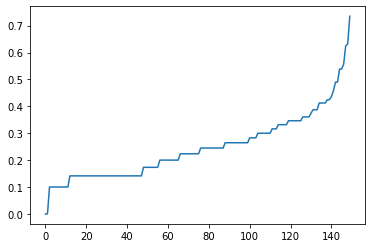

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [21]:
eps_values = np.arange(0.25, 0.5, 0.05)
minPts_values = np.arange(4,9)
len(eps_values), len(minPts_values)

(5, 5)

In [22]:
from itertools import product
params = list(product(eps_values, minPts_values))

In [23]:
from sklearn.metrics import silhouette_score
sil_score = []
for p in params:
    cluster_labels = dbscan(shifted_data.T, p[0], p[1])
    if len(set(cluster_labels)) > 1:
        sil_score.append(silhouette_score(shifted_data.T, cluster_labels))
    else:
        sil_score.append(np.nan)

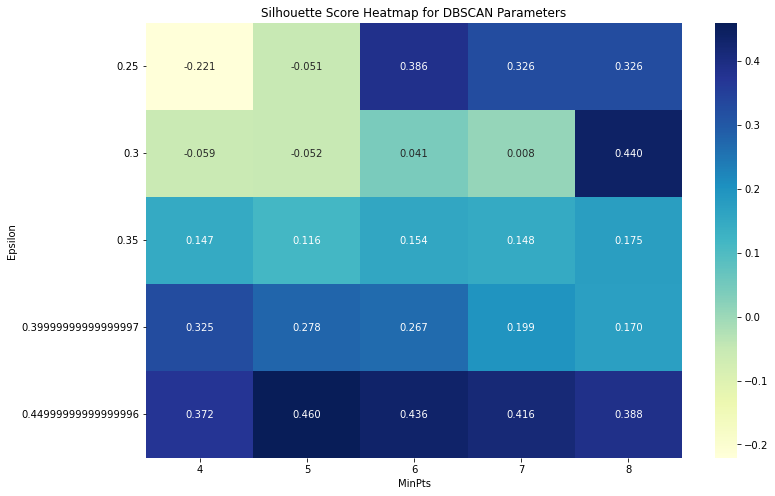

In [26]:
# Create a DataFrame to store the results
df = pd.DataFrame({'Epsilon': [p[0] for p in params],
                   'MinPts': [p[1] for p in params],
                   'Silhouette Score': sil_score})

# Create a pivot table for the heatmap
pivot_df = df.pivot('Epsilon', 'MinPts', 'Silhouette Score')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Silhouette Score Heatmap for DBSCAN Parameters')
plt.show()

In [27]:
cluster_labels = dbscan(shifted_data.T, 0.5,5)
cluster_labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,
        2,  2,  2, -1, -1,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2, -1, -1,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1, -1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [28]:
sum(cluster_labels==-1)

17

In [30]:
for num in clus_num:
    print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster 1: 49
Cluster 2: 84
Cluster -1: 17


## After PCA

In [31]:
cluster_labels = dbscan(data_reduced.T, 0.5,5)

In [32]:
silhouette_score(data_reduced.T, cluster_labels)

0.7642453332157214

In [33]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
for num in set(cluster_labels):
    print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster 1: 50
Cluster 2: 100
